In [15]:
from sqlalchemy import create_engine, inspect, text
import pandas as pd

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin 

In [18]:
import os
print(os.path.exists("../dataset/olist.sqlite"))            # make sure file exists
print(os.path.abspath("../dataset/olist.sqlite"))          # absolute path shown

True
c:\Users\randy\Development\Data Science Projects\Olist Ecommerce SQLite\dataset\olist.sqlite


In [19]:
engine = create_engine("sqlite:///../dataset/olist.sqlite", echo=True)

In [20]:
inspector = inspect(engine)
table_names = inspector.get_table_names()
print(table_names)  

2025-08-28 13:02:44,116 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:44,117 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2025-08-28 13:02:44,118 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-08-28 13:02:44,119 INFO sqlalchemy.engine.Engine ROLLBACK
['customers', 'geolocation', 'leads_closed', 'leads_qualified', 'order_items', 'order_payments', 'order_reviews', 'orders', 'product_category_name_translation', 'products', 'sellers']


In [21]:
with engine.connect() as connection:
    result = connection.execute(text("SELECT * FROM customers LIMIT 5;"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

df.head()  # Display the first few rows of the DataFrame

2025-08-28 13:02:44,280 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:44,281 INFO sqlalchemy.engine.Engine SELECT * FROM customers LIMIT 5;
2025-08-28 13:02:44,281 INFO sqlalchemy.engine.Engine [generated in 0.00173s] ()
2025-08-28 13:02:44,719 INFO sqlalchemy.engine.Engine ROLLBACK


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [22]:
df = pd.read_sql_query("SELECT * FROM customers LIMIT 5;", con=engine)
df.head()

2025-08-28 13:02:44,939 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:44,941 INFO sqlalchemy.engine.Engine SELECT * FROM customers LIMIT 5;
2025-08-28 13:02:44,942 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-08-28 13:02:44,945 INFO sqlalchemy.engine.Engine ROLLBACK


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# Data Integrity Checks

## orders 

In [23]:
query = """
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
        SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS null_order_status,
        SUM(CASE WHEN order_purchase_timestamp IS NULL THEN 1 ELSE 0 END) AS null_order_purchase_timestamp,
        SUM(CASE WHEN order_approved_at IS NULL THEN 1 ELSE 0 END) AS null_order_approved_at,
        SUM(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_carrier_date,
        SUM(CASE WHEN order_delivered_customer_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_customer_date,
        SUM(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 ELSE 0 END) AS null_order_estimated_delivery_date,
        COUNT(*) AS total_rows
    FROM orders;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)

2025-08-28 13:02:44,977 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:44,979 INFO sqlalchemy.engine.Engine 
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
        SUM(CASE WHEN order_status IS NULL THEN 1 ELSE 0 END) AS null_order_status,
        SUM(CASE WHEN order_purchase_timestamp IS NULL THEN 1 ELSE 0 END) AS null_order_purchase_timestamp,
        SUM(CASE WHEN order_approved_at IS NULL THEN 1 ELSE 0 END) AS null_order_approved_at,
        SUM(CASE WHEN order_delivered_carrier_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_carrier_date,
        SUM(CASE WHEN order_delivered_customer_date IS NULL THEN 1 ELSE 0 END) AS null_order_delivered_customer_date,
        SUM(CASE WHEN order_estimated_delivery_date IS NULL THEN 1 ELSE 0 END) AS null_order_estimated_delivery_date,
        COUNT(*) AS total_rows
    FROM orders;

2025-08-28

2025-08-28 13:02:45,386 INFO sqlalchemy.engine.Engine ROLLBACK
   null_customer_unique_id  null_order_id  null_order_status  \
0                        0              0                  0   

   null_order_purchase_timestamp  null_order_approved_at  \
0                              0                     160   

   null_order_delivered_carrier_date  null_order_delivered_customer_date  \
0                               1783                                2965   

   null_order_estimated_delivery_date  total_rows  
0                                   0       99441  


In [24]:
# Check table constrainst 

with engine.connect() as connection:
    result = connection.execute(text("PRAGMA table_info('orders');"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the table info for 'orders'

2025-08-28 13:02:45,418 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:45,419 INFO sqlalchemy.engine.Engine PRAGMA table_info('orders');
2025-08-28 13:02:45,420 INFO sqlalchemy.engine.Engine [generated in 0.00187s] ()
2025-08-28 13:02:45,424 INFO sqlalchemy.engine.Engine ROLLBACK
   cid                           name  type  notnull dflt_value  pk
0    0                       order_id  TEXT        0       None   0
1    1                    customer_id  TEXT        0       None   0
2    2                   order_status  TEXT        0       None   0
3    3       order_purchase_timestamp  TEXT        0       None   0
4    4              order_approved_at  TEXT        0       None   0
5    5   order_delivered_carrier_date  TEXT        0       None   0
6    6  order_delivered_customer_date  TEXT        0       None   0
7    7  order_estimated_delivery_date  TEXT        0       None   0


In [25]:
# Check duplicates in order_id and customer_id

query = """
    SELECT 
        COUNT(DISTINCT order_id) AS unique_order_ids,
        COUNT(order_id) AS total_order_ids
    FROM orders;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())    

print(df)  # Display the counts of order_id and customer_id

2025-08-28 13:02:45,447 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:45,449 INFO sqlalchemy.engine.Engine 
    SELECT 
        COUNT(DISTINCT order_id) AS unique_order_ids,
        COUNT(order_id) AS total_order_ids
    FROM orders;

2025-08-28 13:02:45,450 INFO sqlalchemy.engine.Engine [generated in 0.00227s] ()
2025-08-28 13:02:45,976 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_ids  total_order_ids
0             99441            99441


## customers 

In [26]:
query = """
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_id,
        SUM(CASE WHEN customer_unique_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN customer_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_customer_zip_code_prefix,
        SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) AS null_customer_city,
        SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) AS null_customer_state,
        COUNT(*) AS total_rows  
    FROM customers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the null counts for customers table

2025-08-28 13:02:46,002 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:46,003 INFO sqlalchemy.engine.Engine 
    SELECT 
        SUM(CASE WHEN customer_id IS NULL THEN 1 ELSE 0 END) AS null_customer_id,
        SUM(CASE WHEN customer_unique_id IS NULL THEN 1 ELSE 0 END) AS null_customer_unique_id,
        SUM(CASE WHEN customer_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_customer_zip_code_prefix,
        SUM(CASE WHEN customer_city IS NULL THEN 1 ELSE 0 END) AS null_customer_city,
        SUM(CASE WHEN customer_state IS NULL THEN 1 ELSE 0 END) AS null_customer_state,
        COUNT(*) AS total_rows  
    FROM customers;

2025-08-28 13:02:46,004 INFO sqlalchemy.engine.Engine [generated in 0.00169s] ()
2025-08-28 13:02:46,109 INFO sqlalchemy.engine.Engine ROLLBACK
   null_customer_id  null_customer_unique_id  null_customer_zip_code_prefix  \
0                 0                        0                              0   

   null_customer_city  null_customer_state  t

In [27]:
with engine.connect() as connection:
    result = connection.execute(text("PRAGMA table_info('customers');"))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the table info for 'customers'

2025-08-28 13:02:46,124 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:46,125 INFO sqlalchemy.engine.Engine PRAGMA table_info('customers');
2025-08-28 13:02:46,126 INFO sqlalchemy.engine.Engine [generated in 0.00229s] ()
2025-08-28 13:02:46,128 INFO sqlalchemy.engine.Engine ROLLBACK
   cid                      name     type  notnull dflt_value  pk
0    0               customer_id     TEXT        0       None   0
1    1        customer_unique_id     TEXT        0       None   0
2    2  customer_zip_code_prefix  INTEGER        0       None   0
3    3             customer_city     TEXT        0       None   0
4    4            customer_state     TEXT        0       None   0


In [28]:
query = """
    SELECT 
        COUNT(customer_id) AS total_customer_ids,
        COUNT(DISTINCT customer_id) AS unique_customer_ids
    FROM customers;
"""
with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique customers in orders

2025-08-28 13:02:46,153 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:46,154 INFO sqlalchemy.engine.Engine 
    SELECT 
        COUNT(customer_id) AS total_customer_ids,
        COUNT(DISTINCT customer_id) AS unique_customer_ids
    FROM customers;

2025-08-28 13:02:46,155 INFO sqlalchemy.engine.Engine [generated in 0.00241s] ()
2025-08-28 13:02:46,779 INFO sqlalchemy.engine.Engine ROLLBACK
   total_customer_ids  unique_customer_ids
0               99441                99441


## order_payments

In [29]:
query = """
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN payment_sequential IS NULL THEN 1 ELSE 0 END) AS null_payment_sequential,
    SUM(CASE WHEN payment_type IS NULL THEN 1 ELSE 0 END) AS null_payment_type,
    SUM(CASE WHEN payment_installments IS NULL THEN 1 ELSE 0 END) AS null_payment_installments,
    SUM(CASE WHEN payment_value IS NULL THEN 1 ELSE 0 END) AS null_payment_value,
    COUNT(*) AS total_rows
FROM order_payments;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_payments table

2025-08-28 13:02:46,840 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:46,842 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN payment_sequential IS NULL THEN 1 ELSE 0 END) AS null_payment_sequential,
    SUM(CASE WHEN payment_type IS NULL THEN 1 ELSE 0 END) AS null_payment_type,
    SUM(CASE WHEN payment_installments IS NULL THEN 1 ELSE 0 END) AS null_payment_installments,
    SUM(CASE WHEN payment_value IS NULL THEN 1 ELSE 0 END) AS null_payment_value,
    COUNT(*) AS total_rows
FROM order_payments;

2025-08-28 13:02:46,844 INFO sqlalchemy.engine.Engine [generated in 0.00375s] ()
2025-08-28 13:02:46,939 INFO sqlalchemy.engine.Engine ROLLBACK
   null_order_id  null_payment_sequential  null_payment_type  \
0              0                        0                  0   

   null_payment_installments  null_payment_value  total_rows  
0                          0                   0      10388

## products 

In [30]:
query = """
SELECT 
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_name_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_name_lenght,
    SUM(CASE WHEN product_description_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_description_lenght,
    SUM(CASE WHEN product_photos_qty IS NULL THEN 1 ELSE 0 END) AS null_product_photos_qty,
    SUM(CASE WHEN product_weight_g IS NULL THEN 1 ELSE 0 END) AS null_product_weight_g,
    SUM(CASE WHEN product_length_cm IS NULL THEN 1 ELSE 0 END) AS null_product_length_cm,
    SUM(CASE WHEN product_height_cm IS NULL THEN 1 ELSE 0 END) AS null_product_height_cm,
    SUM(CASE WHEN product_width_cm IS NULL THEN 1 ELSE 0 END) AS null_product_width_cm,
    COUNT(*) AS total_rows
FROM products;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for products table

2025-08-28 13:02:46,962 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:46,963 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_name_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_name_lenght,
    SUM(CASE WHEN product_description_lenght IS NULL THEN 1 ELSE 0 END) AS null_product_description_lenght,
    SUM(CASE WHEN product_photos_qty IS NULL THEN 1 ELSE 0 END) AS null_product_photos_qty,
    SUM(CASE WHEN product_weight_g IS NULL THEN 1 ELSE 0 END) AS null_product_weight_g,
    SUM(CASE WHEN product_length_cm IS NULL THEN 1 ELSE 0 END) AS null_product_length_cm,
    SUM(CASE WHEN product_height_cm IS NULL THEN 1 ELSE 0 END) AS null_product_height_cm,
    SUM(CASE WHEN product_width_cm IS NULL THEN 1 ELSE 0 END) AS null_product_width_cm,
    COUNT(*) AS total_rows
FROM products;


In [31]:
query = """
SELECT 
    COUNT(DISTINCT product_id) AS unique_product_ids,
    COUNT(product_id) AS total_product_ids
FROM products;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the count of unique products in products table

2025-08-28 13:02:47,052 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:47,054 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT product_id) AS unique_product_ids,
    COUNT(product_id) AS total_product_ids
FROM products;

2025-08-28 13:02:47,054 INFO sqlalchemy.engine.Engine [generated in 0.00260s] ()
2025-08-28 13:02:47,122 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_product_ids  total_product_ids
0               32951              32951


## order_items

In [32]:
query = """
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN order_item_id IS NULL THEN 1 ELSE 0 END) AS null_order_item_id,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN shipping_limit_date IS NULL THEN 1 ELSE 0 END) AS null_shipping_limit_date,
    SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) AS null_price,
    SUM(CASE WHEN freight_value IS NULL THEN 1 ELSE 0 END) AS null_freight_value,
    COUNT(*) AS total_rows
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_items table

2025-08-28 13:02:47,146 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:47,148 INFO sqlalchemy.engine.Engine 
SELECT
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN order_item_id IS NULL THEN 1 ELSE 0 END) AS null_order_item_id,
    SUM(CASE WHEN product_id IS NULL THEN 1 ELSE 0 END) AS null_product_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN shipping_limit_date IS NULL THEN 1 ELSE 0 END) AS null_shipping_limit_date,
    SUM(CASE WHEN price IS NULL THEN 1 ELSE 0 END) AS null_price,
    SUM(CASE WHEN freight_value IS NULL THEN 1 ELSE 0 END) AS null_freight_value,
    COUNT(*) AS total_rows
FROM order_items;

2025-08-28 13:02:47,149 INFO sqlalchemy.engine.Engine [generated in 0.00290s] ()
2025-08-28 13:02:47,336 INFO sqlalchemy.engine.Engine ROLLBACK
   null_order_id  null_order_item_id  null_product_id  null_seller_id  \
0              0                   0                0     

In [33]:
query = """
SELECT 
    COUNT(DISTINCT order_id) AS unique_order_ids,
    COUNT(order_id) AS total_order_ids,
    COUNT(DISTINCT order_item_id) AS unique_order_item_ids,
    COUNT(order_item_id) AS total_order_ids
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())

print(df)  # Display the count of unique orders in order_items table

2025-08-28 13:02:47,362 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:47,363 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT order_id) AS unique_order_ids,
    COUNT(order_id) AS total_order_ids,
    COUNT(DISTINCT order_item_id) AS unique_order_item_ids,
    COUNT(order_item_id) AS total_order_ids
FROM order_items;

2025-08-28 13:02:47,364 INFO sqlalchemy.engine.Engine [generated in 0.00261s] ()
2025-08-28 13:02:47,474 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_ids  total_order_ids  unique_order_item_ids  total_order_ids
0             98666           112650                     21           112650


In [34]:
query = """
SELECT 
    COUNT(DISTINCT CONCAT(order_id, order_item_id)) AS unique_order_item_combinations,
    COUNT(*) AS total_rows
FROM order_items;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique order-item combinations in order_items table

2025-08-28 13:02:47,503 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:47,504 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT CONCAT(order_id, order_item_id)) AS unique_order_item_combinations,
    COUNT(*) AS total_rows
FROM order_items;

2025-08-28 13:02:47,505 INFO sqlalchemy.engine.Engine [generated in 0.00265s] ()
2025-08-28 13:02:47,747 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_order_item_combinations  total_rows
0                          112650      112650


## order_reviews

In [35]:
query = """
SELECT 
    SUM(CASE WHEN review_id IS NULL THEN 1 ELSE 0 END) AS null_review_id,
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN review_score IS NULL THEN 1 ELSE 0 END) AS null_review_score,
    SUM(CASE WHEN review_comment_title IS NULL THEN 1 ELSE 0 END) AS null_review_comment_title,
    SUM(CASE WHEN review_comment_message IS NULL THEN 1 ELSE 0 END) AS null_review_comment_message,
    SUM(CASE WHEN review_creation_date IS NULL THEN 1 ELSE 0 END) AS null_review_creation_date,
    SUM(CASE WHEN review_answer_timestamp IS NULL THEN 1 ELSE 0 END) AS null_review_answer_timestamp,
    COUNT(*) AS total_rows
FROM order_reviews;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for order_reviews table

2025-08-28 13:02:47,772 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:47,773 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN review_id IS NULL THEN 1 ELSE 0 END) AS null_review_id,
    SUM(CASE WHEN order_id IS NULL THEN 1 ELSE 0 END) AS null_order_id,
    SUM(CASE WHEN review_score IS NULL THEN 1 ELSE 0 END) AS null_review_score,
    SUM(CASE WHEN review_comment_title IS NULL THEN 1 ELSE 0 END) AS null_review_comment_title,
    SUM(CASE WHEN review_comment_message IS NULL THEN 1 ELSE 0 END) AS null_review_comment_message,
    SUM(CASE WHEN review_creation_date IS NULL THEN 1 ELSE 0 END) AS null_review_creation_date,
    SUM(CASE WHEN review_answer_timestamp IS NULL THEN 1 ELSE 0 END) AS null_review_answer_timestamp,
    COUNT(*) AS total_rows
FROM order_reviews;

2025-08-28 13:02:47,775 INFO sqlalchemy.engine.Engine [generated in 0.00308s] ()
2025-08-28 13:02:47,964 INFO sqlalchemy.engine.Engine ROLLBACK
   null_review_id  null_order_id  null_review_score  \

In [36]:
query = """
SELECT
    COUNT(DISTINCT review_id) AS unique_review_ids,
    COUNT(review_id) AS total_review_ids
FROM order_reviews;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique reviews in order_reviews table


2025-08-28 13:02:48,112 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,114 INFO sqlalchemy.engine.Engine 
SELECT
    COUNT(DISTINCT review_id) AS unique_review_ids,
    COUNT(review_id) AS total_review_ids
FROM order_reviews;

2025-08-28 13:02:48,115 INFO sqlalchemy.engine.Engine [generated in 0.00363s] ()
2025-08-28 13:02:48,832 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_review_ids  total_review_ids
0              98410             99224


## product_category_name_tranlation

In [37]:
query = """
SELECT 
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_category_name_english IS NULL THEN 1 ELSE 0 END) AS null_product_category_name_english,
    COUNT(*) AS total_rows
FROM product_category_name_translation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for product_category_name_translation table

2025-08-28 13:02:48,851 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,852 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN product_category_name IS NULL THEN 1 ELSE 0 END) AS null_product_category_name,
    SUM(CASE WHEN product_category_name_english IS NULL THEN 1 ELSE 0 END) AS null_product_category_name_english,
    COUNT(*) AS total_rows
FROM product_category_name_translation;

2025-08-28 13:02:48,854 INFO sqlalchemy.engine.Engine [generated in 0.00272s] ()
2025-08-28 13:02:48,857 INFO sqlalchemy.engine.Engine ROLLBACK
   null_product_category_name  null_product_category_name_english  total_rows
0                           0                                   0          71


In [38]:
query = """
SELECT 
    COUNT(DISTINCT product_category_name) AS unique_product_category_names,
    COUNT(product_category_name) AS total_product_category_names
FROM product_category_name_translation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique product category names in product_category_name_translation table

2025-08-28 13:02:48,881 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,883 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT product_category_name) AS unique_product_category_names,
    COUNT(product_category_name) AS total_product_category_names
FROM product_category_name_translation;

2025-08-28 13:02:48,884 INFO sqlalchemy.engine.Engine [generated in 0.00286s] ()
2025-08-28 13:02:48,887 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_product_category_names  total_product_category_names
0                             71                            71


## sellers 

In [39]:
query = """
SELECT
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN seller_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_seller_zip_code_prefix,
    SUM(CASE WHEN seller_city IS NULL THEN 1 ELSE 0 END) AS null_seller_city,
    SUM(CASE WHEN seller_state IS NULL THEN 1 ELSE 0 END) AS null_seller_state,
    COUNT(*) AS total_rows
FROM sellers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for sellers table


2025-08-28 13:02:48,912 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,913 INFO sqlalchemy.engine.Engine 
SELECT
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN seller_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_seller_zip_code_prefix,
    SUM(CASE WHEN seller_city IS NULL THEN 1 ELSE 0 END) AS null_seller_city,
    SUM(CASE WHEN seller_state IS NULL THEN 1 ELSE 0 END) AS null_seller_state,
    COUNT(*) AS total_rows
FROM sellers;

2025-08-28 13:02:48,915 INFO sqlalchemy.engine.Engine [generated in 0.00370s] ()
2025-08-28 13:02:48,928 INFO sqlalchemy.engine.Engine ROLLBACK
   null_seller_id  null_seller_zip_code_prefix  null_seller_city  \
0               0                            0                 0   

   null_seller_state  total_rows  
0                  0        3095  


In [40]:
query = """
SELECT 
    COUNT(DISTINCT seller_id) AS unique_seller_ids,
    COUNT(seller_id) AS total_seller_ids
FROM sellers;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique sellers in sellers table

2025-08-28 13:02:48,958 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,959 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT seller_id) AS unique_seller_ids,
    COUNT(seller_id) AS total_seller_ids
FROM sellers;

2025-08-28 13:02:48,960 INFO sqlalchemy.engine.Engine [generated in 0.00282s] ()
2025-08-28 13:02:48,968 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_seller_ids  total_seller_ids
0               3095              3095


## geolocation

In [41]:
query = """
SELECT 
    SUM(CASE WHEN geolocation_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_geolocation_zip_code_prefix,
    SUM(CASE WHEN geolocation_lat IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lat,
    SUM(CASE WHEN geolocation_lng IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lng,
    SUM(CASE WHEN geolocation_city IS NULL THEN 1 ELSE 0 END) AS null_geolocation_city,
    SUM(CASE WHEN geolocation_state IS NULL THEN 1 ELSE 0 END) AS
    null_geolocation_state,
    COUNT(*) AS total_rows
FROM geolocation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for geolocation table


2025-08-28 13:02:48,988 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:48,989 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN geolocation_zip_code_prefix IS NULL THEN 1 ELSE 0 END) AS null_geolocation_zip_code_prefix,
    SUM(CASE WHEN geolocation_lat IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lat,
    SUM(CASE WHEN geolocation_lng IS NULL THEN 1 ELSE 0 END) AS null_geolocation_lng,
    SUM(CASE WHEN geolocation_city IS NULL THEN 1 ELSE 0 END) AS null_geolocation_city,
    SUM(CASE WHEN geolocation_state IS NULL THEN 1 ELSE 0 END) AS
    null_geolocation_state,
    COUNT(*) AS total_rows
FROM geolocation;

2025-08-28 13:02:48,990 INFO sqlalchemy.engine.Engine [generated in 0.00227s] ()
2025-08-28 13:02:49,689 INFO sqlalchemy.engine.Engine ROLLBACK
   null_geolocation_zip_code_prefix  null_geolocation_lat  \
0                                 0                     0   

   null_geolocation_lng  null_geolocation_city  null_geolocation_state  \
0              

In [42]:
query = """
SELECT 
    COUNT(DISTINCT geolocation_zip_code_prefix) AS unique_geolocation_zip_code_prefixes,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;
"""
with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique geolocation zip code prefixes in geolocation table

2025-08-28 13:02:49,704 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:49,705 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT geolocation_zip_code_prefix) AS unique_geolocation_zip_code_prefixes,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;

2025-08-28 13:02:49,706 INFO sqlalchemy.engine.Engine [generated in 0.00202s] ()
2025-08-28 13:02:49,992 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_geolocation_zip_code_prefixes  total_geolocation_zip_code_prefixes
0                                 19015                              1000163


In [43]:
query = """
SELECT
    COUNT(DISTINCT CONCAT(geolocation_zip_code_prefix, '_', geolocation_city, '_', geolocation_state)) AS unique_geolocation_entries,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique geolocation zip code prefixes in geolocation table

2025-08-28 13:02:50,011 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:50,013 INFO sqlalchemy.engine.Engine 
SELECT
    COUNT(DISTINCT CONCAT(geolocation_zip_code_prefix, '_', geolocation_city, '_', geolocation_state)) AS unique_geolocation_entries,
    COUNT(geolocation_zip_code_prefix) AS total_geolocation_zip_code_prefixes
FROM geolocation;

2025-08-28 13:02:50,014 INFO sqlalchemy.engine.Engine [generated in 0.00252s] ()
2025-08-28 13:02:51,333 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_geolocation_entries  total_geolocation_zip_code_prefixes
0                       27912                              1000163


## leads_qualified

In [44]:
query = """
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN first_contact_date IS NULL THEN 1 ELSE 0 END) AS null_first_contact_date,
    SUM(CASE WHEN landing_page_id IS NULL THEN 1 ELSE 0 END) AS null_landing_page_id,
    SUM(CASE WHEN origin IS NULL THEN 1 ELSE 0 END) AS null_origin,
    COUNT(*) AS total_rows
FROM leads_qualified;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for leads_qualified table

2025-08-28 13:02:51,415 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:51,417 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN first_contact_date IS NULL THEN 1 ELSE 0 END) AS null_first_contact_date,
    SUM(CASE WHEN landing_page_id IS NULL THEN 1 ELSE 0 END) AS null_landing_page_id,
    SUM(CASE WHEN origin IS NULL THEN 1 ELSE 0 END) AS null_origin,
    COUNT(*) AS total_rows
FROM leads_qualified;

2025-08-28 13:02:51,418 INFO sqlalchemy.engine.Engine [generated in 0.00296s] ()
2025-08-28 13:02:51,437 INFO sqlalchemy.engine.Engine ROLLBACK
   null_mql_id  null_first_contact_date  null_landing_page_id  null_origin  \
0            0                        0                     0           60   

   total_rows  
0        8000  


In [45]:
query = """
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids,
    COUNT(DISTINCT landing_page_id) AS unique_landing_page_ids,
    COUNT(landing_page_id) AS total_landing_page_ids
FROM leads_qualified;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique mql_ids and landing_page_ids in leads_qualified table


2025-08-28 13:02:51,464 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:51,466 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids,
    COUNT(DISTINCT landing_page_id) AS unique_landing_page_ids,
    COUNT(landing_page_id) AS total_landing_page_ids
FROM leads_qualified;

2025-08-28 13:02:51,466 INFO sqlalchemy.engine.Engine [generated in 0.00224s] ()
2025-08-28 13:02:51,483 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_mql_ids  total_mql_ids  unique_landing_page_ids  \
0            8000           8000                      495   

   total_landing_page_ids  
0                    8000  


## leads_closed

In [46]:
query = """
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN sdr_id IS NULL THEN 1 ELSE 0 END) AS null_sdr_id,
    SUM(CASE WHEN sr_id IS NULL THEN 1 ELSE 0 END) AS null_sr_id,
    SUM(CASE WHEN won_date IS NULL THEN 1 ELSE 0 END) AS null_won_date,
    SUM(CASE WHEN business_segment IS NULL THEN 1 ELSE 0 END) AS null_business_segment,
    SUM(CASE WHEN lead_type IS NULL THEN 1 ELSE 0 END) AS null_lead_type,
    SUM(CASE WHEN lead_behaviour_profile IS NULL THEN 1 ELSE 0 END) AS null_lead_behaviour_profile, 
    SUM(CASE WHEN has_company IS NULL THEN 1 ELSE 0 END) AS null_has_company,
    SUM(CASE WHEN has_gtin IS NULL THEN 1 ELSE 0 END) AS null_has_gtin,
    SUM(CASE WHEN average_stock IS NULL THEN 1 ELSE 0 END) AS null_average_stock,
    SUM(CASE WHEN business_type IS NULL THEN 1 ELSE 0 END) AS null_business_type,   
    SUM(CASE WHEN declared_monthly_revenue IS NULL THEN 1 ELSE 0 END) AS null_declared_monthly_revenue, 
    SUM(CASE WHEN declared_product_catalog_size IS NULL THEN 1 ELSE 0 END) AS null_declared_product_catalog_size,
    COUNT(*) AS total_rows
FROM leads_closed;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the null counts for leads_closed table


2025-08-28 13:02:51,512 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:51,514 INFO sqlalchemy.engine.Engine 
SELECT 
    SUM(CASE WHEN mql_id IS NULL THEN 1 ELSE 0 END) AS null_mql_id,
    SUM(CASE WHEN seller_id IS NULL THEN 1 ELSE 0 END) AS null_seller_id,
    SUM(CASE WHEN sdr_id IS NULL THEN 1 ELSE 0 END) AS null_sdr_id,
    SUM(CASE WHEN sr_id IS NULL THEN 1 ELSE 0 END) AS null_sr_id,
    SUM(CASE WHEN won_date IS NULL THEN 1 ELSE 0 END) AS null_won_date,
    SUM(CASE WHEN business_segment IS NULL THEN 1 ELSE 0 END) AS null_business_segment,
    SUM(CASE WHEN lead_type IS NULL THEN 1 ELSE 0 END) AS null_lead_type,
    SUM(CASE WHEN lead_behaviour_profile IS NULL THEN 1 ELSE 0 END) AS null_lead_behaviour_profile, 
    SUM(CASE WHEN has_company IS NULL THEN 1 ELSE 0 END) AS null_has_company,
    SUM(CASE WHEN has_gtin IS NULL THEN 1 ELSE 0 END) AS null_has_gtin,
    SUM(CASE WHEN average_stock IS NULL THEN 1 ELSE 0 END) AS null_average_stock,
    SUM(CASE WHEN busin

In [47]:
query = """
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids
FROM leads_closed;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the count of unique mql_ids in leads_closed table

2025-08-28 13:02:51,563 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:51,564 INFO sqlalchemy.engine.Engine 
SELECT 
    COUNT(DISTINCT mql_id) AS unique_mql_ids,
    COUNT(mql_id) AS total_mql_ids
FROM leads_closed;

2025-08-28 13:02:51,567 INFO sqlalchemy.engine.Engine [generated in 0.00357s] ()
2025-08-28 13:02:51,572 INFO sqlalchemy.engine.Engine ROLLBACK
   unique_mql_ids  total_mql_ids
0             842            842


The only table that seemed to have problems is geolocation. there isn't a combination of columns to be used as foreign keys for the tables with relation to it and the duplicated information on the original table. Therefore for this analysis we will avoid using the geolocation table

# Exploratory Data Analysis

## Seasonal & Weekly Effects on Sales

In [48]:
# Revenue and number of orders
query = """
SELECT 
    DATE(orders.order_purchase_timestamp) AS order_date,
    SUM(price) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(price) AS avg_order_value
FROM order_items 
LEFT JOIN orders USING(order_id)
GROUP BY order_date
ORDER BY order_date;
""" 

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the revenue and number of orders per day

df["order_date"] = pd.to_datetime(df["order_date"])

2025-08-28 13:02:51,612 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:51,614 INFO sqlalchemy.engine.Engine 
SELECT 
    DATE(orders.order_purchase_timestamp) AS order_date,
    SUM(price) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders,
    AVG(price) AS avg_order_value
FROM order_items 
LEFT JOIN orders USING(order_id)
GROUP BY order_date
ORDER BY order_date;

2025-08-28 13:02:51,615 INFO sqlalchemy.engine.Engine [generated in 0.00263s] ()
2025-08-28 13:02:53,305 INFO sqlalchemy.engine.Engine ROLLBACK
     order_date  total_revenue  total_orders  avg_order_value
0    2016-09-04          72.89             1        36.445000
1    2016-09-05          59.50             1        59.500000
2    2016-09-15         134.97             1        44.990000
3    2016-10-02         100.00             1       100.000000
4    2016-10-03         463.48             8        57.935000
..          ...            ...           ...              ...
611  2018-08-26        80

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_date       616 non-null    datetime64[ns]
 1   total_revenue    616 non-null    float64       
 2   total_orders     616 non-null    int64         
 3   avg_order_value  616 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 19.4 KB


In [50]:
significant_event_date = df[df["total_revenue"] == df["total_revenue"].max()]["order_date"].dt.strftime('%Y-%m-%d').values[0]
print(f"Significant event date: {significant_event_date}")

Significant event date: 2017-11-24


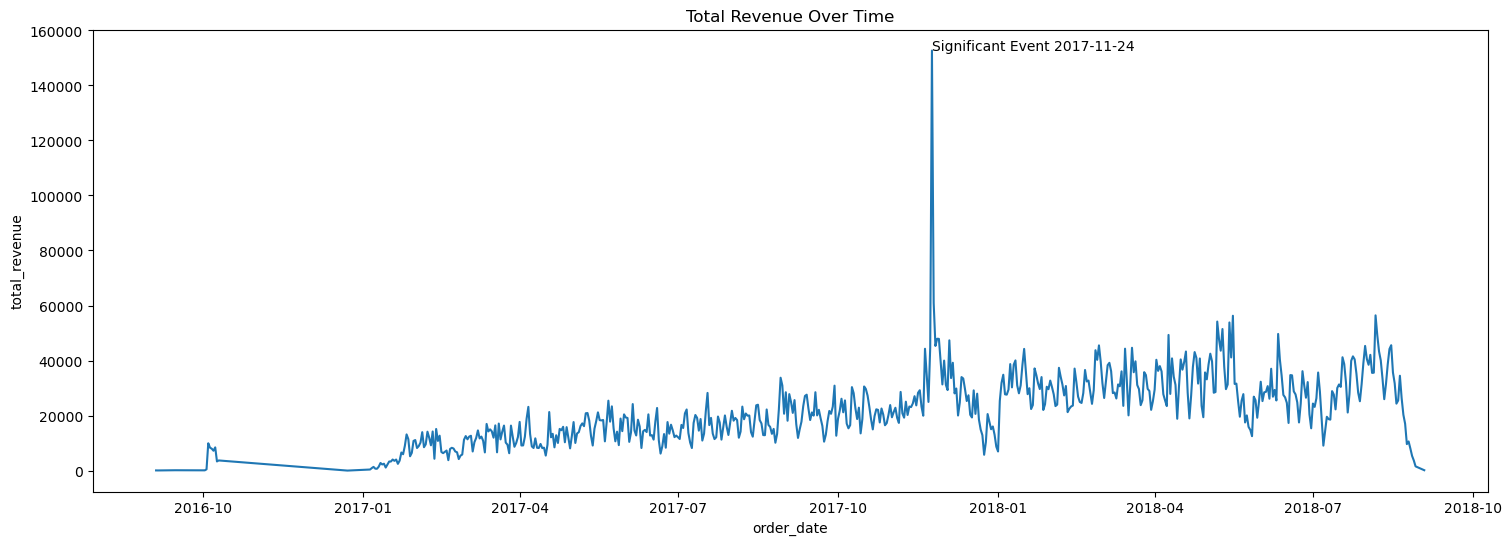

In [51]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(data=df, x="order_date", y="total_revenue", ax=ax)
plt.title("Total Revenue Over Time")
ax.annotate(f"Significant Event {significant_event_date}", xy=(df[df["total_revenue"] == df["total_revenue"].max()]["order_date"], df["total_revenue"].max())) 
plt.show()

This shows that the average revenue gained is volatile from day to day and month to month, We'll conduct some statistical tests to check wether the differences are statistically significant

In [52]:
alpha = 0.05

In [53]:
df["order_week"] = df["order_date"].dt.isocalendar().week
df["order_month"] = df["order_date"].dt.month
df["order_day"] = df["order_date"].dt.weekday

df.head()

,order_date,total_revenue,total_orders,avg_order_value,order_week,order_month,order_day
0,2016-09-04,72.89,1,36.445,35,9,6
1,2016-09-05,59.50,1,59.500,36,9,0
2,2016-09-15,134.97,1,44.990,37,9,3
3,2016-10-02,100.00,1,100.000,39,10,6
4,2016-10-03,463.48,8,57.935,40,10,0


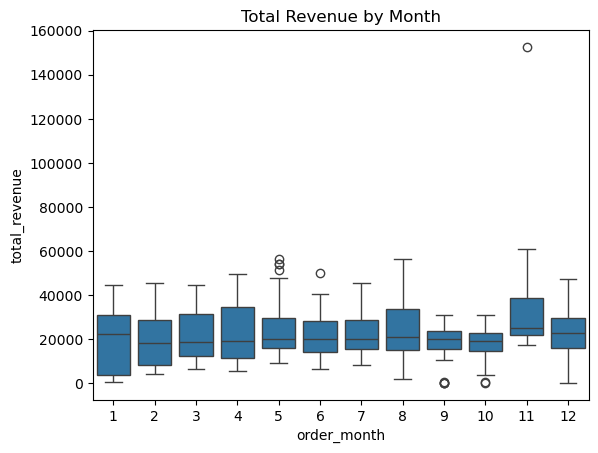

In [54]:
sns.boxplot(data=df, x="order_month", y="total_revenue")
plt.title("Total Revenue by Month")
plt.show()

In [55]:
pingouin.welch_anova(dv='total_revenue', between='order_month', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,order_month,11,216.617915,2.788039,0.002062,0.070816


In [56]:
pairwise_test = pingouin.pairwise_tests(dv='total_revenue', between='order_month', data=df, padjust='bonf', alternative="two-sided")

pairwise_test[pairwise_test['p-corr'] < alpha]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges


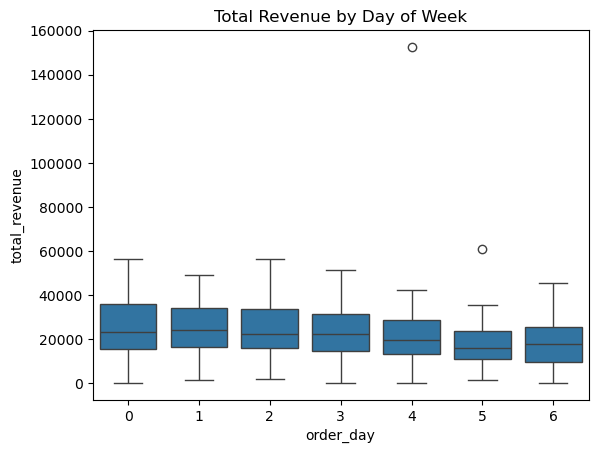

In [57]:
sns.boxplot(data=df, x="order_day", y="total_revenue")
plt.title("Total Revenue by Day of Week")
plt.show()

In [58]:
pingouin.welch_anova(dv='total_revenue', between='order_day', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,order_day,6,269.716343,8.443537,2.084728e-08,0.056072


In [59]:
pairwise_test = pingouin.pairwise_tests(dv='total_revenue', between='order_day', data=df, padjust='bonf', alternative="greater")

pairwise_test[pairwise_test['p-corr'] < alpha]

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
4,order_day,0,5,False,True,4.304521,152.547179,greater,1.490041e-05,0.000313,bonf,1318.884,0.639870
5,order_day,0,6,False,True,3.888474,159.331850,greater,7.389094e-05,0.001552,bonf,300.564,0.577703
9,order_day,1,5,False,True,4.940758,172.000000,greater,9.170097e-07,0.000019,bonf,1.595e+04,0.745844
10,order_day,1,6,False,True,4.447096,167.866593,greater,7.890678e-06,0.000166,bonf,2250.427,0.668862
13,order_day,2,5,False,True,4.393941,172.000000,greater,9.710105e-06,0.000204,bonf,1832.098,0.663298
14,order_day,2,6,False,True,3.929715,165.300499,greater,6.238928e-05,0.001310,bonf,345.282,0.591305
16,order_day,3,5,False,True,3.693926,165.213284,greater,1.499133e-04,0.003148,bonf,157.001,0.555324
17,order_day,3,6,False,True,3.226068,170.673840,greater,7.522382e-04,0.015797,bonf,37.413,0.483305


Although there aren't any statistically significant difference between months, the tests shows that on average the revenue on weekdays (Monday - Thursday) are higher than weekends (Friday - Sunday)

## Top Products & Category by Revenue

In [60]:
query = """
    WITH oi_summary AS (
        SELECT
            product_id,
            COUNT(*)                        AS total_units_sold,     -- units (1 row = 1 unit)
            COUNT(DISTINCT order_id)        AS total_orders,         -- orders containing the product
            COALESCE(SUM(price),0)          AS total_revenue
        FROM order_items
        GROUP BY product_id
    )
    SELECT
    p.product_id,
    pc.product_category_name_english AS product_category,
    oi.total_units_sold,
    oi.total_orders,
    oi.total_revenue
    FROM products p
    LEFT JOIN oi_summary oi 
        ON p.product_id = oi.product_id
    LEFT JOIN product_category_name_translation pc
        ON p.product_category_name = pc.product_category_name
    ORDER BY oi.total_revenue DESC
""" 

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the revenue and number of orders per product and category

2025-08-28 13:02:57,424 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 13:02:57,425 INFO sqlalchemy.engine.Engine 
    WITH oi_summary AS (
        SELECT
            product_id,
            COUNT(*)                        AS total_units_sold,     -- units (1 row = 1 unit)
            COUNT(DISTINCT order_id)        AS total_orders,         -- orders containing the product
            COALESCE(SUM(price),0)          AS total_revenue
        FROM order_items
        GROUP BY product_id
    )
    SELECT
    p.product_id,
    pc.product_category_name_english AS product_category,
    oi.total_units_sold,
    oi.total_orders,
    oi.total_revenue
    FROM products p
    LEFT JOIN oi_summary oi 
        ON p.product_id = oi.product_id
    LEFT JOIN product_category_name_translation pc
        ON p.product_category_name = pc.product_category_name
    ORDER BY oi.total_revenue DESC

2025-08-28 13:02:57,426 INFO sqlalchemy.engine.Engine [generated in 0.00211s] ()
2025-08-28 13:02:58,

In [61]:
grouped = df.groupby("product_category").agg({
    "total_units_sold": "sum",
    "total_orders": "sum",
    "total_revenue": "sum"
}).reset_index()

grouped = grouped.sort_values(by="total_revenue", ascending=False)

grouped

,product_category,total_units_sold,total_orders,total_revenue
43,health_beauty,9670,9022,1258681.34
70,watches_gifts,5991,5799,1205005.68
7,bed_bath_table,11115,10160,1036988.68
65,sports_leisure,8641,7858,988048.97
15,computers_accessories,7827,6887,911954.32
...,...,...,...,...
35,flowers,33,29,1110.04
46,home_comfort_2,30,24,760.27
11,cds_dvds_musicals,14,12,730.00
29,fashion_childrens_clothes,8,8,569.85


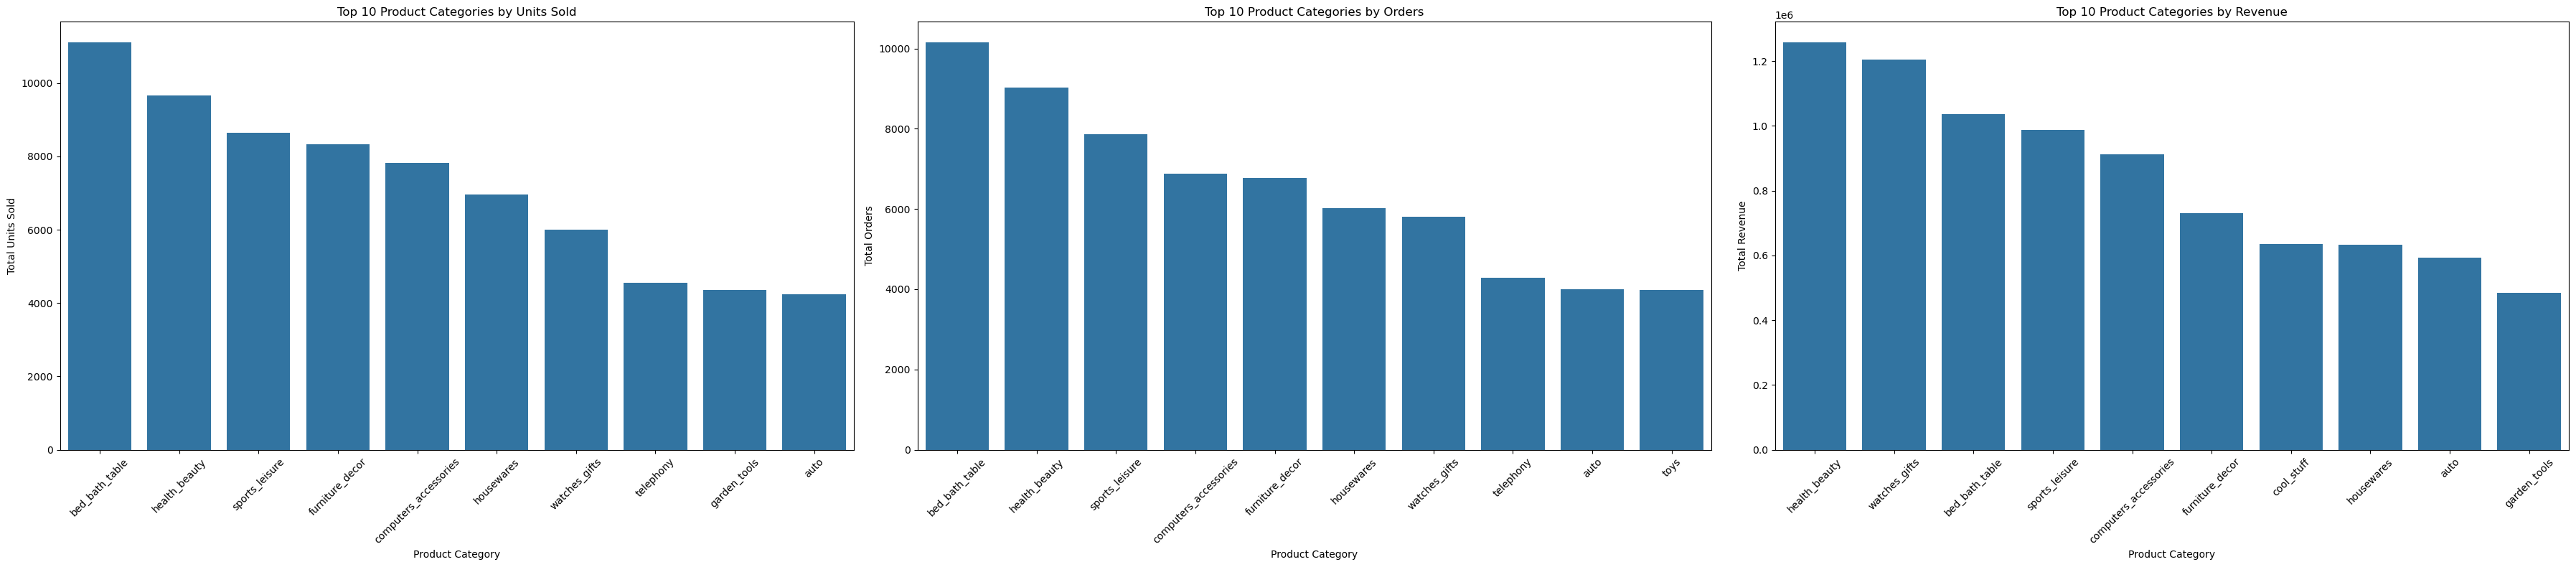

In [66]:
fig, axes = plt.subplots(1, 3, figsize=(36, 8), sharey=False, sharex=False)

sns.barplot(data=grouped.sort_values(by="total_units_sold", ascending=False).head(10), x="product_category", y="total_units_sold", ax=axes[0])
axes[0].set_title("Top 10 Product Categories by Units Sold")
axes[0].set_xlabel("Product Category")
axes[0].set_ylabel("Total Units Sold")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped.sort_values(by="total_orders", ascending=False).head(10), x="product_category", y="total_orders", ax=axes[1])
axes[1].set_title("Top 10 Product Categories by Orders")
axes[1].set_xlabel("Product Category")
axes[1].set_ylabel("Total Orders")
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=grouped.head(10), x="product_category", y="total_revenue", ax=axes[2])
axes[2].set_title("Top 10 Product Categories by Revenue")
axes[2].set_xlabel("Product Category")
axes[2].set_ylabel("Total Revenue")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

We can see the top performing categories
    By Revenue :
        - Health and Beauty
        - Watches Gift
        - Bed Bath Table
    By Number of Orders :
        - Bed Bath Table
        - Health and Beauty
        - Sports Leisure
    By Number of Units Sold :
        - Bed Bath Table
        - Health and Beauty
        - Sports Leisure

This also signals some of the top performing category's revenues are generated by number of sales (eg. Health and Beauty, Bed Bath Table) while others by the premium price (eg. Watches Gift)

## Order Payments Behaviour

In [79]:
query = """
    SELECT
        op.order_id,
        SUM(op.payment_value)                 AS paid_total,
        COUNT(DISTINCT op.payment_type)       AS distinct_methods,
        GROUP_CONCAT(DISTINCT op.payment_type)   AS methods_used,
        MAX(op.payment_installments) AS payment_installments
    FROM order_payments op
    GROUP BY op.order_id
    ORDER BY paid_total DESC;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))
    tables = result.fetchall()
    df = pd.DataFrame(tables, columns=result.keys())
print(df)  # Display the payment methods and their total values

2025-08-28 15:26:16,020 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-08-28 15:26:16,022 INFO sqlalchemy.engine.Engine 
    SELECT
        op.order_id,
        SUM(op.payment_value)                 AS paid_total,
        COUNT(DISTINCT op.payment_type)       AS distinct_methods,
        GROUP_CONCAT(DISTINCT op.payment_type)   AS methods_used,
        MAX(op.payment_installments) AS payment_installments
    FROM order_payments op
    GROUP BY op.order_id
    ORDER BY paid_total DESC;

2025-08-28 15:26:16,023 INFO sqlalchemy.engine.Engine [generated in 0.00314s] ()
2025-08-28 15:26:17,334 INFO sqlalchemy.engine.Engine ROLLBACK
                               order_id  paid_total  distinct_methods  \
0      03caa2c082116e1d31e67e9ae3700499    13664.08                 1   
1      736e1922ae60d0d6a89247b851902527     7274.88                 1   
2      0812eb902a67711a1cb742b3cdaa65ae     6929.31                 1   
3      fefacc66af859508bf1a7934eab1e97f     6922.21                 

In [121]:
df[df["payment_installments"] > 1]["distinct_methods"].value_counts()

distinct_methods
1    50452
2      718
Name: count, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              99440 non-null  object 
 1   paid_total            99440 non-null  float64
 2   distinct_methods      99440 non-null  int64  
 3   methods_used          99440 non-null  object 
 4   payment_installments  99440 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


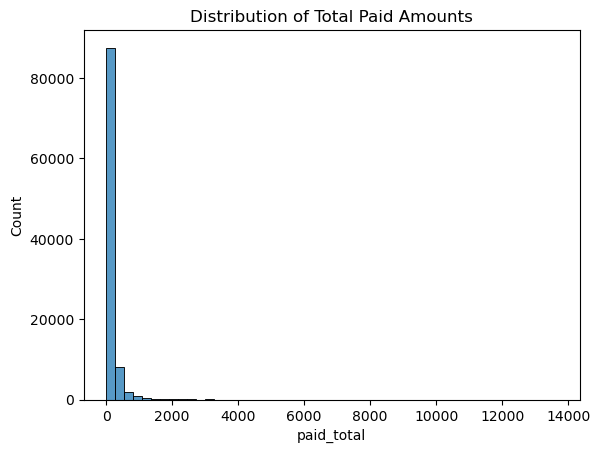

In [85]:
sns.histplot(data=df, x="paid_total", bins=50)
plt.title("Distribution of Total Paid Amounts")
plt.show()

The data is extremely right skewed, meaning a lot of orders are of small spendings

In [82]:
df["is_installed"] = np.where(df["payment_installments"] > 1, "Yes", "No")
df["is_multiple_methods"] = np.where(df["distinct_methods"] > 1, "Yes", "No")

In [109]:
n = len(df)
average_paid = df["paid_total"].mean()
std_error = df["paid_total"].std(ddof=1) / np.sqrt(n)

critical_value = stats.t.cdf(0.975, df=n-1)  # two-tailed 95% CI
margin_of_error = critical_value * std_error

lower_bound = average_paid - margin_of_error
upper_bound = average_paid + margin_of_error

print(f"Average Paid: {average_paid}, Std Error: {std_error}")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")

Average Paid: 160.99026669348348, Std Error: 0.7038450333528754
95% Confidence Interval: (160.40240217089652, 161.57813121607043)


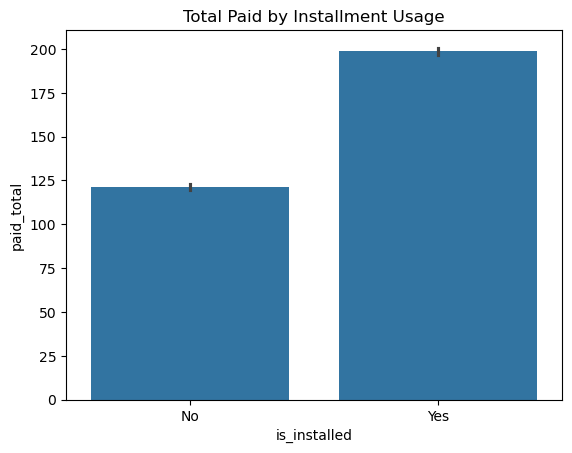

In [89]:
sns.barplot(data=df, x="is_installed", y="paid_total", estimator=np.mean)
plt.title("Total Paid by Installment Usage")
plt.show()

In [ ]:
installed_means = df.groupby("is_installed")["paid_total"].mean()
installed_stds = df.groupby("is_installed")["paid_total"].std()
installed_counts = df.groupby("is_installed")["paid_total"].count()

In [119]:
summary = pd.concat([installed_means, installed_stds, installed_counts], axis=1)
summary.columns = ["mean", "std", "count"]

summary

,mean,std,count
is_installed,,,
No,121.036364,183.320553,48270
Yes,198.679828,247.195376,51170


In [110]:
t_stat, p_val = stats.ttest_ind(
    df[df["is_installed"] == "Yes"]["paid_total"],
    df[df["is_installed"] == "No"]["paid_total"],
    equal_var=False,
    alternative="greater"
)

print(f"T-statistic: {t_stat}, P-value: {p_val}, reject H0: {p_val < alpha}")

T-statistic: 56.47155561716406, P-value: 0.0, reject H0: True


The average paid total on orders paid in installments are higher than orders of single payments, and there's an extremely strong evidence that mean paid_total is higher for installment orders.

<Axes: xlabel='is_multiple_methods', ylabel='paid_total'>

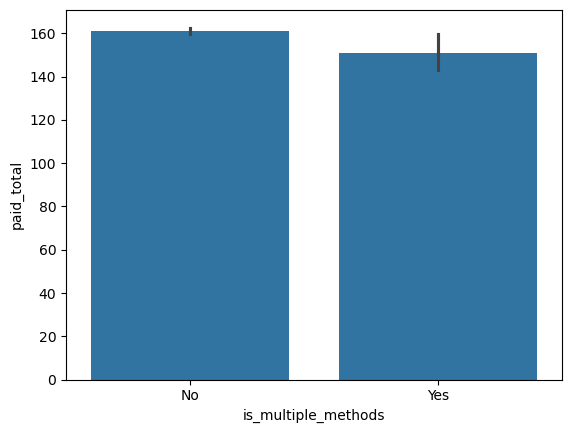

In [103]:
sns.barplot(data=df, x="is_multiple_methods", y="paid_total", estimator=np.mean)

In [100]:
distinct_means = df.groupby("is_multiple_methods")["paid_total"].mean()
distinct_stds = df.groupby("is_multiple_methods")["paid_total"].std()
distinct_counts = df.groupby("is_multiple_methods")["paid_total"].count()

In [120]:
summary = pd.concat([distinct_means, distinct_stds, distinct_counts], axis=1)
summary.columns = ["mean", "std", "count"]

summary

,mean,std,count
is_multiple_methods,,,
No,161.223964,222.492419,97194
Yes,150.877199,196.893191,2246


In [118]:
t_stat, p_val = stats.ttest_ind(
    df[df["is_multiple_methods"] == "Yes"]["paid_total"],
    df[df["is_multiple_methods"] == "No"]["paid_total"],
    equal_var=False,
    alternative="less"
)

print(f"T-statistic: {t_stat}, P-value: {p_val}, reject H0: {p_val < alpha}")

T-statistic: -2.4545047486818246, P-value: 0.007089514900739413, reject H0: True


The average paid total on orders paid with 1 method of payment is higher than orders paid with multiple payment, with weak evidence

# Key Insights and Recommendation

## Key Insights

1. Seasonality and Trends:
    - There are significant variations in total revenue based on the month and day of the week.
    - Although some months show higher revenue, the evidence is not strong enough to confirm specific months are better than others.
    - For days however, there is a statistically significant evidence that Weekdays (Monday-Thursday) have a higher revenue than Weekends (Friday- Sunday)
2. Top Products and Categories:
    - Top products by revenue : Health and Beauty, Watches Gift, Bed Bath Table
    - Top products by number of orders : Bed Bath Table, Health and Beauty, Sports Leisure
    - Top products by number of units sold : Bed Bath Table, Health and Beauty, Sports Leisure
    - The difference of rankings between performance by revenue and by quantities shows some categories generate revenue more one the price premium while some generate revenue by volume 
3. Order Payments Behaviour
    - The average payment for an order is 160.99 with a 95% confidence interval between 160.4 and 161.5
    - There is a strong evidence that orders paid in installments have a higher total payment than orders paid in single payment
    - There is a weak evidence showing that orders 

## Actionable Recommendations 

1. Exploit weekday strength
    - Run targeted promotional campaigns Monday–Thursday. Weekdays show reliably higher daily revenue → higher chance promotions convert and produce incremental revenue.
    - Create weekday-only promo codes (e.g., time-limited discounts, email pushes, flash bundles). and baseline campaign on weekends
2. Tailor strategy per category
    - Differentiate interventions based on whether category is price-driven (health_beauty, watches_gifts) or volume-driven (bed_bath_table).
    - Price-driven categories: focus on premium merchandising, bundles, warranty/upsell (higher margin).
    - Volume-driven categories: focus on cross-sell, volume discounts, buy-1-get-1, shipping thresholds to increase AOV (Average order value).
3. Payments and Conversions 
    - Leverage installments to increase AOV. Customers who use installments spend more, consider promoting installment options for mid/high value carts.
    - Multiple payment methods are used for some orders and show a small difference in order value. ensure reconciliation & fraud controls.

## Futurue Analysis

1. Customer Segmentation : Perform detailed segmentation to understand different customer groups and tailor strategies accordingly.
2. Churn Analysis: Identify factors leading to customer churn and develop strategies to mitigate them.
3. Customer Life Time Value : Estimate total revenue a business can expect from a single customer throughout their entire relationship.
4. Recommenders : Create a system that can recommend customers the items based on their segment